This project is a variation on the gradient descent algorithm used to solve regression problems, implemented from scratch using linear alegebra

# Gradient Ascent

One dimentional gradient ascent:
Finding the maximum of the equation -x^2

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
from scipy.misc import derivative
import matplotlib.pyplot as plt
import scipy.stats as st

guess = -3; step = 0.1; precision = 10**-6

def f(x):
    return -x**2

def f_prime(x):
    return derivative(f, x, dx=1e-6)
    
i = 0
while f_prime(guess) > precision and i < 100:
    guess = guess + step * f_prime(guess)
    i = i + 1

print(i)
print(guess)

70
-4.93651367182e-07


## The 2D Version

In [2]:
def GA(M,guess, step, precision):
    i=0
    guessList = [];
    guessList.append([guess.item(0), guess.item(1)])
    while  ( all(m > precision for m in ( abs(-2 * M.dot(guess)))) ) and i < 1000:
        guess = guess + step * -2 * M.dot(guess)
        guessList.append([guess.item(0), guess.item(1)])
        i = i + 1
    print(i)
    print(-2 * M.dot(guess))
    return guessList;

136
[[ -3.74354895e-06]
 [  9.94153470e-07]]


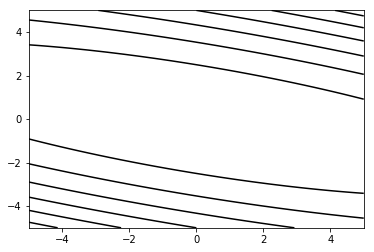

In [3]:
guess = np.matrix('2;-3')
A = np.matrix('1 2;2 8')

x1v = np.linspace(-5,5,100)
y2v = np.linspace(-5,5,100)
x1,x2 = np.meshgrid(x1v, y2v)

def f(x):
    return x.T.dot(A).dot(x)

z= np.empty_like(x1)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        z[i,j] = f(np.array([x1[i,j], x2[i,j]]))
        
values = GA(A, guess, .1, 10**-6)
plt.contour(x1, x2, z, colors='black')
plt.show()

In [4]:
guess = np.matrix('10; 20; 30; 40; 50')
A = np.matrix('11 4 7 10 13; 4 17 10 13 16; 7 10 23 16 19; 10 13 16 29 22; 13 16 19 22 35')
values = GA(A, guess, .01, 10**-6)

211
[[  5.72356705e-06]
 [  3.35913651e-06]
 [  9.94705960e-07]
 [ -1.36972459e-06]
 [ -3.73415513e-06]]


## Condition Numbers

In [5]:
(max(np.linalg.eigvals(A))/min(np.linalg.eigvals(A)))**(1/2)

4.6944602540140332

90
[[ -8.25321820e-07]
 [  1.07181577e-06]]


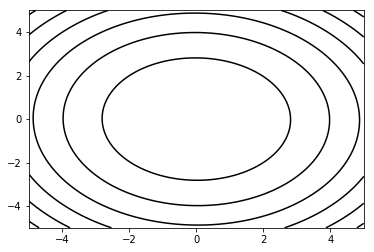

764
[[ -9.90129120e-07]
 [  9.90129120e-07]]


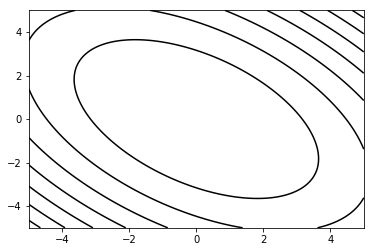

1000
[[-0.04093572]
 [ 0.04093572]]


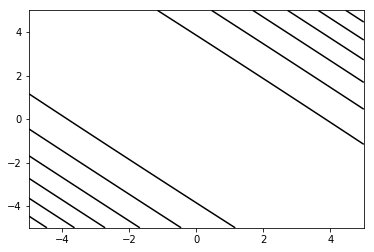

In [6]:
A = np.matrix(np.ones((2,2)))
C = A + 100*np.identity(2)

def f(x):
    return x.T.dot(C).dot(x)


guess = np.matrix('2;-3')
values = GA(C,guess, .001, 10**-6)

z= np.empty_like(x1)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        z[i,j] = f(np.array([x1[i,j], x2[i,j]]))

plt.contour(x1, x2, z, colors='black')
plt.show()


A = np.matrix(np.ones((2,2)))
C = A + 1*np.identity(2)

def f(x):
    return x.T.dot(C).dot(x)

guess = np.matrix('2;-3')
values = GA(C,guess, .01, 10**-6)

z= np.empty_like(x1)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        z[i,j] = f(np.array([x1[i,j], x2[i,j]]))

plt.contour(x1, x2, z, colors='black')
plt.show()


A = np.matrix(np.ones((2,2)))
C = A + .01*np.identity(2)

def f(x):
    return x.T.dot(C).dot(x)

guess = np.matrix('2;-3')
values = GA(C,guess, .01, 10**-6)

z= np.empty_like(x1)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        z[i,j] = f(np.array([x1[i,j], x2[i,j]]))

plt.contour(x1, x2, z, colors='black')
plt.show()


The .001 learning rate resulted in the fastest convergence